# PROYECTO V - PROBLEMA DE REGRESIÓN

En este proyecto de problema de regresión hemos decidido usar un [Dataset](https://www.kaggle.com/competitions/playground-series-s4e9/overview) de precio de coches usados. El proyecto está enfocado a las personas que quieran vender su coche y quieran tener una idea del precio de venta de antemano. Para poder hacer un estudio del Dataset y crear un Modelo que prediga los precios de venta del coche lo primero que vamos a hacer es una limpieza del Dataset, ver los valores faltantes o outliers y poder tratarlos.

Tras la limpieza de los datos los datos para calcular el precio del coche son:
- **Características:**
    - age: antigüedad del vehículo en años
    - milage: kilometraje acumulado
    - accident: accidente reportado o no
    - engine_hp: potencia del motor en HP
    - brand_id: marca del vehículo (codificado)
    - model_id: modelo del vehículo (codificado)
    - fuel_type_id: tipo de combustible (codificado)
    - transmission_norm: tipo de transmisión (codificado) (Automático, Manual, Otros)
- **Etiqueta:** precio del coche

Vamos a ver los pasos que hemos realizado para llegar a tener las columnas listas.

## PASO 1: REVISAR EL DATASET

### Importar el dataset.

In [65]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install scikit-learn

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('data/used_cars.csv')

### Imprimir cabeceras del dataset y tener una idea clara de los tipos de datos que tenemos.

In [67]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


### Eliminar la columna 'clean_title' porque no lo vamos a usar.

In [68]:
df.drop(['clean_title'], axis=1, inplace=True)

### Imprimir los elementos y subniveles que tiene cada columna.

In [69]:
cols_cat = ['brand','model','milage','fuel_type','engine','transmission','ext_col','int_col','accident','price']

for col in cols_cat:
    print(f'Column {col}: {df[col].nunique()} subniveles')

Column brand: 57 subniveles
Column model: 1898 subniveles
Column milage: 2818 subniveles
Column fuel_type: 7 subniveles
Column engine: 1146 subniveles
Column transmission: 62 subniveles
Column ext_col: 319 subniveles
Column int_col: 156 subniveles
Column accident: 2 subniveles
Column price: 1569 subniveles


### Mostrar todas las filas y columnas

In [70]:
pd.set_option('display.max_columns', None)

print(df)

         brand                            model  model_year      milage  \
0         Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1      Hyundai                     Palisade SEL        2021  34,742 mi.   
2        Lexus                    RX 350 RX 350        2022  22,372 mi.   
3     INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4         Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   
...        ...                              ...         ...         ...   
4004   Bentley             Continental GT Speed        2023     714 mi.   
4005      Audi             S4 3.0T Premium Plus        2022  10,900 mi.   
4006   Porsche                           Taycan        2022   2,116 mi.   
4007      Ford                     F-150 Raptor        2020  33,000 mi.   
4008       BMW                     X3 xDrive30i        2020  43,000 mi.   

          fuel_type                                             engine  \
0     E85 Flex Fuel  300.

## Variables numéricas y categóricas

Hay 55 marcas distintas en el dataset, lo cual es una buena diversidad.
Las más frecuentes son Ford y BMW, cada una con cerca del 10% del total.
1,817 modelos únicos, con un nivel de granularidad alto.
Los modelos más frecuentes alcanzan el 0.7–0.4% del total.
Hay 6 tipos de combustible, gasolina domina.
Muchas variantes de transmisiones automáticas y manuales (considerar agrupar por tipo general: "Manual", "Automático", "CVT", etc.).

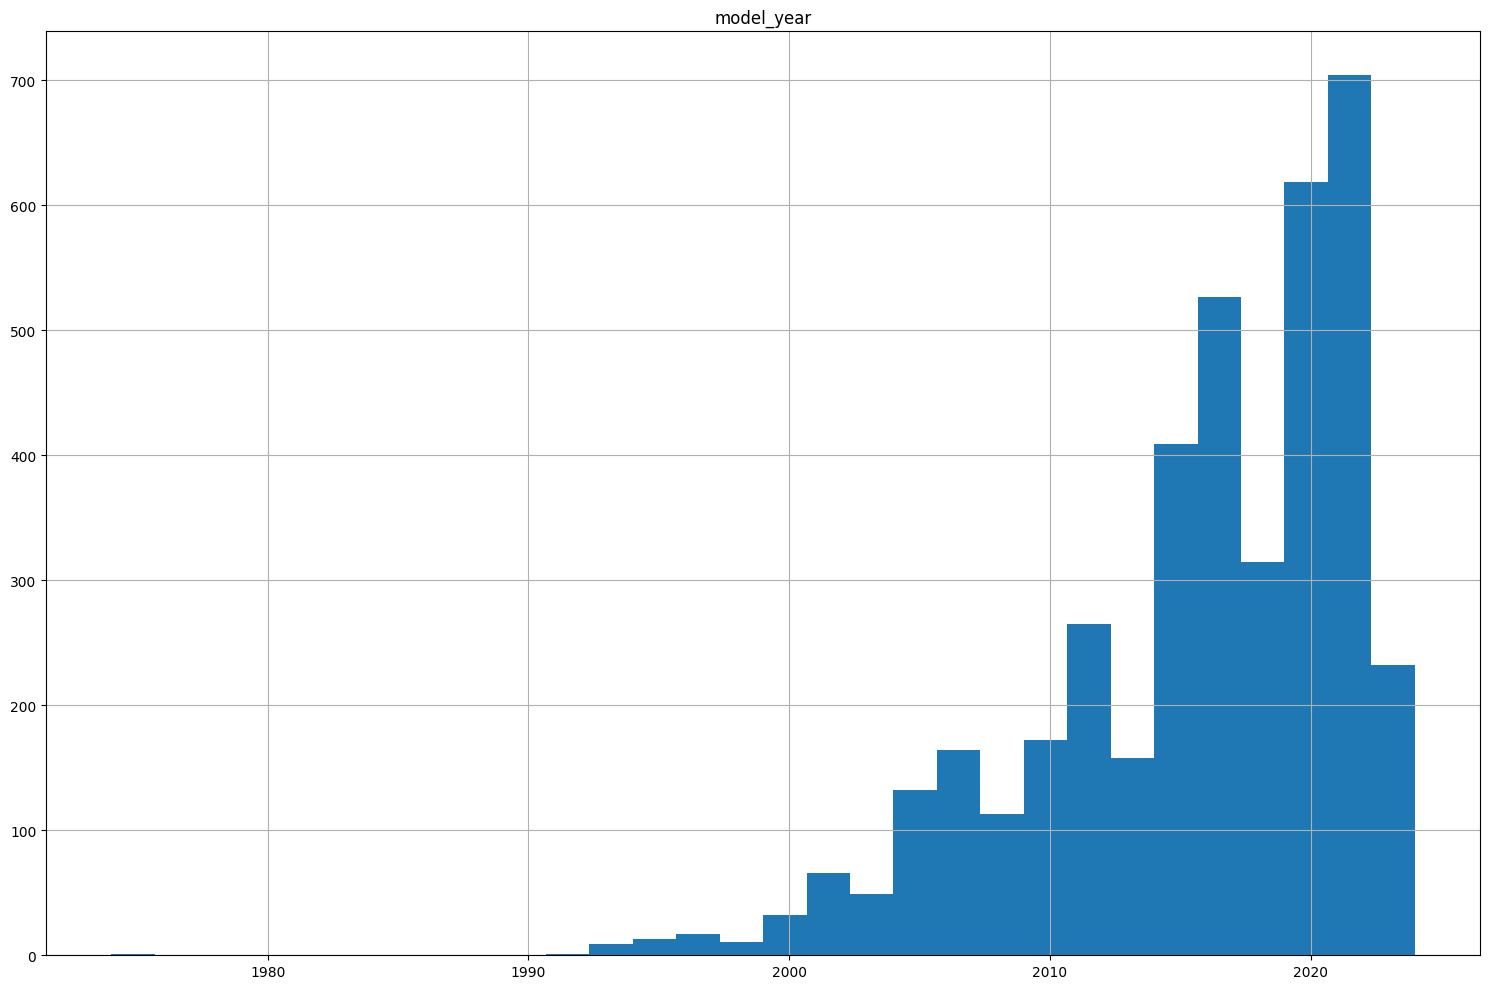


brand - 57 valores únicos
brand
Ford             0.096283
BMW              0.093540
Mercedes-Benz    0.078573
Chevrolet        0.072836
Porsche          0.050137
Name: proportion, dtype: float64

model - 1898 valores únicos
model
M3 Base          0.007483
F-150 XLT        0.005987
Corvette Base    0.005488
1500 Laramie     0.004490
Camaro 2SS       0.004240
Name: proportion, dtype: float64

milage - 2818 valores únicos
milage
110,000 mi.    0.003991
45,000 mi.     0.003742
120,000 mi.    0.003243
55,000 mi.     0.003243
92,000 mi.     0.002993
Name: proportion, dtype: float64

fuel_type - 7 valores únicos
fuel_type
Gasoline         0.861943
Hybrid           0.050534
E85 Flex Fuel    0.036207
Diesel           0.030216
–                0.011722
Name: proportion, dtype: float64

engine - 1146 valores únicos
engine
2.0L I4 16V GDI DOHC Turbo                               0.012971
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             0.011973
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel

In [71]:
df.describe()


numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n{col} - {df[col].nunique()} valores únicos")
    print(df[col].value_counts(normalize=True).head(5))

### Limpieza de la columna 'milage'

Como vemos la columna'milage' está en tipo de dato object y además el formato no nos dejaría hacer un análisis. Por ello, hemos decidido eliminar el string 'mi.', reemplazar el ',' por '.' y cambiarlo a tipo float.

In [72]:
df['milage'] = df['milage'].str.replace('mi.', '', regex=False).str.replace(',', '.').astype(float)

### Limpieza de la columna 'price'

Hacemos lo mismo con la columna 'price', eliminando el signo de '$' y cambiando el ',' por ' '.

In [73]:
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

### Limpieza de la columna 'engine'

Esta columna ha sido la más problemática, porque nos dimos cuena que había muchas diferentes opciones y variables. Para esto hemos usado expresiones regulares (regex) para buscar recuencias de carácteres y patrones comunes en esta columna y crear una nueva columna para cada uno de ellos.

In [74]:
df['engine'].unique()

array(['300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability',
       '3.8L V6 24V GDI DOHC', '3.5 Liter DOHC', ...,
       '136.0HP 1.8L 4 Cylinder Engine Gasoline Fuel',
       '270.0HP 2.0L 4 Cylinder Engine Gasoline Fuel',
       '420.0HP 5.9L 12 Cylinder Engine Gasoline Fuel'],
      shape=(1146,), dtype=object)

**Creación de la columna 'engine_size' mediante regex a partir de 'engine'** : Hemos tomado el carácter 'L' como filtro, para extraer la capacidad del motor del coche. 

Por ejemplo lo que antes era:

    ['engine] = 3.8L V6 24V GDI DOHC

Ahora es:

    ['engine_size] 3.8


In [75]:
df['engine_size'] = df['engine'].str.extract(r'(\d.\d+)\s?L').astype(float)

**Creación de la columna 'engine_type' meidante regex a partir de la columna 'engine'**: Hemos tomado como carácteres delimitantes las palabras 'I\d', 'Electric', 'Hybrid', 'Turbo', 'Diesel'.

Por ejemplo lo que antes era:

    ['engine'] = 534.0HP Electric Motor Electric Fuel System

Ahora es:

    [engine_type'] = Electric

Y además, las columnas vacías hemos reestablecido como 'Unknown'


In [76]:
df['engine_type'] = df['engine'].str.extract(r'(V\d|I\d|Electric|Hybrid|Turbo|Diesel)', expand=False)
df['engine_type'] = df['engine_type'].fillna('Unknown')

**Creación de la columna 'engine_hp' mediante regex a partir de la columna 'engine'**: Hemos tomado como carácter delimitador el string 'HP'.

Por ejemplo lo que antes era:

    ['engine'] = 534.0HP Electric Motor Electric Fuel System

Ahora es:

    [engine_hp'] = 534.0


In [77]:
df['engine_hp'] = df['engine'].str.extract(r'(\d+.?\d*)\s?HP')
df['engine_hp'] = pd.to_numeric(df['engine_hp'], errors='coerce')

### Eliminamos las columnas 'engine', 'ext_col' e 'int_color'

In [78]:
df = df.drop(columns=['engine','ext_col','int_col'])

### Normalizar la columna 'accident'

Hemos convertido en valores booleanos la columna 'accident':

    'None reported' => 0
    'At least 1 accident or damage reported' => 1
    'nan' => 0

In [79]:
df['accident'] = df['accident'].map({
    'None reported': 0,
    'At least 1 accident or damage reported': 1
}).where(pd.notna(df['accident'])).astype('Int64')

df['accident'] = df['accident'].fillna(0).astype('Int64')

### Pasando la columna price a int

In [80]:
df["price"] = df["price"].astype(int)

### Completamos los valores vacios de Fuel_type por Electric (corroborado en la otra columna engine_type)

In [81]:
df["fuel_type"] = df["fuel_type"].fillna("Electric")

### Luego de evaluar decidimos borrar la columna engine_type

In [82]:
df.drop(['engine_type'], axis=1, inplace=True)

### Craar columnas brand_id y model_id

Para que el modelo funcione teniendo en cuenta la marca ('brand') y el modelo ('model') decidimos usar LabelEncoder para pasar de string a int.

Desde la columna 'brand' creamos una nueva columna 'brand_id' y desde la columna 'model' creamos una nueva columna 'model_id'. Además guardamos cada columna con su respectivo código en un nuevo archivo csv para tener una referencia.

In [83]:
from sklearn.preprocessing import LabelEncoder

brand_le = LabelEncoder()
model_le = LabelEncoder()

df["brand_id"] = brand_le.fit_transform(df["brand"])
df["model_id"] = model_le.fit_transform(df["model"])

# Imprimir las marcas con sus respectivos códigos
#for i, brand in enumerate(le.classes_):
    #print(f"{brand} → {i}")

import pandas as pd

brand_mapping = {brand: i for i, brand in enumerate(brand_le.classes_)}
brand_df = pd.DataFrame(list(brand_mapping.items()), columns=["brand", "code"])
brand_df.to_csv("data/brand_enumeration.csv", index=False)

model_mapping = {model: i for i, model in enumerate(model_le.classes_)}
model_df = pd.DataFrame(list(model_mapping.items()), columns=["model", "code"])
model_df.to_csv("data/model_enumeration.csv", index=False)


print("Brands guardados en data/brand_enumeration.csv ✅")
print("Modelos guardado en data/model_enumeration.csv ✅")


Brands guardados en data/brand_enumeration.csv ✅
Modelos guardado en data/model_enumeration.csv ✅


### Reemplazar los valores '-' y 'not supported' de la columna 'fuel_type' por 'Electric'

Hemos visto que hay 45 filas que contienen '-' y 2 filas que contienen 'not supported' en la columna 'fuel_type' y damos por hecho que si pone eso es que no es ni Gasolina ni Diesel, y decidimos reemplazarlos por 'Electric'.


In [84]:
df['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', 'Electric', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [85]:
df['fuel_type'].isin(['–']).sum()

np.int64(45)

In [86]:
df['fuel_type'].isin(['not supported']).sum()

np.int64(2)

In [87]:

df['fuel_type'] = df['fuel_type'].replace('–', 'Electric')
df['fuel_type'] = df['fuel_type'].replace('not supported', 'Electric')

In [88]:
df['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', 'Electric', 'Diesel',
       'Plug-In Hybrid'], dtype=object)

### Crear nueva columna 'fuel_type_id' a partir de 'fuel_type' pasado a números para poder usarlos en el modelo

In [89]:
from sklearn.preprocessing import LabelEncoder

# creamos el encoder
le_fuel = LabelEncoder()

#fuel_type a int
df['fuel_type_id'] = le_fuel.fit_transform(df['fuel_type'])

fuel_mapping = {fuel: i for i, fuel in enumerate(le_fuel.classes_)}
fuel_df = pd.DataFrame(list(fuel_mapping.items()), columns=["fuel_type", "code"])
fuel_df.to_csv("data/fuel_type_enumeration.csv", index=False)

print("Fuel_type guardado en data/fuel_type_enumeration.csv ✅")

Fuel_type guardado en data/fuel_type_enumeration.csv ✅


In [90]:
df['fuel_type_id'].unique()

array([1, 3, 4, 2, 0, 5])

In [91]:
df.head(5)

,brand,model,model_year,milage,fuel_type,transmission,accident,price,engine_size,engine_hp,brand_id,model_id,fuel_type_id
0,Ford,Utility Police Interceptor Base,2013,51.000,E85 Flex Fuel,6-Speed A/T,1,10300,3.7,300.0,14,1743,1
1,Hyundai,Palisade SEL,2021,34.742,Gasoline,8-Speed Automatic,1,38005,3.8,NaN,19,1182,3
2,Lexus,RX 350 RX 350,2022,22.372,Gasoline,Automatic,0,54598,3.5,NaN,27,1325,3
3,INFINITI,Q50 Hybrid Sport,2015,88.900,Hybrid,7-Speed A/T,0,15500,3.5,354.0,20,1242,4
4,Audi,Q3 45 S line Premium Plus,2021,9.835,Gasoline,8-Speed Automatic,0,34999,2.0,NaN,3,1225,3


### Limpieza en la columna 'transmission'

In [92]:
# Ver valores únicos y sus conteos de la columna 'transmission'
df['transmission'].value_counts()

transmission
A/T                                  1037
8-Speed A/T                           406
Transmission w/Dual Shift Mode        398
6-Speed A/T                           362
6-Speed M/T                           248
                                     ... 
10-Speed Automatic with Overdrive       1
9-Speed Automatic with Auto-Shift       1
SCHEDULED FOR OR IN PRODUCTION          1
6 Speed Mt                              1
8-Speed Manual                          1
Name: count, Length: 62, dtype: int64

In [93]:
df['transmission'].nunique()

62

Hemos visto que hay 3 modelos de la marca 'Acura' que tienen '2' en la columna 'transmission' y tras indagar online, hemos llegado a la conclusion de que dichas marcas, con ese modelo, ese tipo de combustible y de dichos años, tienen el tipo de transmisón '10-Speed A/T', por lo que procedemos a reemplazarlos.

In [94]:
df[df['transmission'] == '2']

,brand,model,model_year,milage,fuel_type,transmission,accident,price,engine_size,engine_hp,brand_id,model_id,fuel_type_id
269,Acura,TLX w/A-Spec Package,2022,14.896,Gasoline,2,0,39998,2.0,NaN,0,1648,3
516,Acura,MDX w/Technology Package,2022,30.177,Gasoline,2,0,46598,3.5,NaN,0,1005,3
2381,Acura,RDX PMC Edition,2021,44.457,Gasoline,2,0,40598,2.0,NaN,0,1298,3


despues de investigar, se observa que el valor '2' corresponde a '10-Speed A/T' y los reemplazamos para que no haya confusiones

In [95]:
df.loc[df['transmission'] == '2', 'transmission'] = '10-Speed A/T'


comprobamos que el cambio se realizó correctamente

In [96]:
df[df['transmission'] == '2']

,brand,model,model_year,milage,fuel_type,transmission,accident,price,engine_size,engine_hp,brand_id,model_id,fuel_type_id


In [97]:
df['transmission'].isin(['–']).sum()

np.int64(4)

También hemos encontrado 4 filas que contienen '-' en la columna 'transmission' pero aún indagando no hemos encontrado una respuesta clara de qué tipo de transmisión tienen estos 4 vehículos, por lo que lo mantenemos para su posterior estudio.

### Expresión regular para reemplazar los valores duplicados en 'transmission'


In [98]:
df['transmission'].value_counts()

transmission
A/T                                  1037
8-Speed A/T                           406
Transmission w/Dual Shift Mode        398
6-Speed A/T                           362
6-Speed M/T                           248
                                     ... 
10-Speed Automatic with Overdrive       1
9-Speed Automatic with Auto-Shift       1
SCHEDULED FOR OR IN PRODUCTION          1
6 Speed Mt                              1
8-Speed Manual                          1
Name: count, Length: 61, dtype: int64

Hay muchos valores duplicados como:

    '1-Speed Automatic' y '1-Speed A/T',

    '6-Speed Automatic' y '6-Speed A/T',
    
    Así hasta '10-Speed Automatic'

Estos pares son el mismo tipo de transmisión, por lo que decidimos reemplazar los 'n-Speed Automatic' por 'n-Speed A/T' para que haya menos uniques.

In [99]:
import re

df['transmission'] = df['transmission'].str.replace(r'(\d+)-Speed Automatic', r'\1-Speed A/T', regex=True)

Tambien reemplazamos otros valores que vemos duplicados:

In [100]:
df['transmission'] = df['transmission'].str.replace('Automatic', 'A/T', regex=False)
df['transmission'] = df['transmission'].str.replace('A/T, 8-Spd', '8-Speed A/T', regex=False)
df['transmission'] = df['transmission'].str.replace('8-SPEED A/T', '8-Speed A/T', regex=False)
df['transmission'] = df['transmission'].str.replace('6-Speed Manual', '6-Speed M/T', regex=False)
df['transmission'] = df['transmission'].str.replace('6 Speed Mt', '6-Speed M/T', regex=False)
df['transmission'] = df['transmission'].str.replace('7-Speed Manual', '7-Speed M/T', regex=False)
df['transmission'] = df['transmission'].str.replace('M/T', 'Manual', regex=False)
df['transmission'] = df['transmission'].str.replace('Manual, 6-Spd', '6-Speed M/T', regex=False)
df['transmission'] = df['transmission'].str.replace('A/T, 10-Spd', '10-Speed A/T', regex=False)

valores finales tras limpieza

In [101]:
df['transmission'].value_counts()

transmission
A/T                                                            1274
8-Speed A/T                                                     587
6-Speed A/T                                                     435
Transmission w/Dual Shift Mode                                  398
6-Speed Manual                                                  257
7-Speed A/T                                                     216
10-Speed A/T                                                    179
9-Speed A/T                                                     121
5-Speed A/T                                                      95
1-Speed A/T                                                      78
4-Speed A/T                                                      76
CVT Transmission                                                 62
5-Speed Manual                                                   59
Manual                                                           42
A/T CVT                            

contar los valores únicos de 'transmission' después de la limpieza

In [102]:
df['transmission'].nunique()

44

### Normalizar los valores de 'transmission' para tener 3 valores únicos

0 = Es automático

1 = Manual

2 = Otros, Dual Shift

In [103]:
def normalize_transmission(value):
    if pd.isnull(value):
        return 2
    elif 'A/T' in value or 'CVT' in value:
        return 0
    elif 'M/T' in value or 'Manual' in value:
        return 1
    else:
        return 2

df['transmission_norm'] = df['transmission'].apply(normalize_transmission)

# creamos el DataFrame con las transmisiones y sus códigos
df_transmission = pd.DataFrame({
    'transmission': ['Automatico', 'Manual', 'Otros'],
    'encode': [0, 1, 2]
})

df_transmission.to_csv('data/transmission_enumeration.csv', index=False)

print("Transmission_norm guardado en data/transmission_enumeration.csv ✅")


Transmission_norm guardado en data/transmission_enumeration.csv ✅


### Rellenar los campos vacíos de 'engine_hp' teniendo en cuenta el 'engine_size'

In [104]:
hp_means_by_engine_size = df.groupby('engine_size')['engine_hp'].mean().round()

df['engine_hp'] = df.apply(
    lambda row: hp_means_by_engine_size[row['engine_size']] 
    if pd.isna(row['engine_hp']) and not pd.isna(row['engine_size']) 
    else row['engine_hp'],
    axis=1
)

### Eliminar la columna 'engine_size'

Ahora que tenemos la columna 'engine_hp' normalizado y rellenado con los datos correspondientes, decidimos eliminar la columna 'engine_size' por ser irrelevante.

In [105]:
df.drop('engine_size', axis=1, inplace=True)

### Outliers

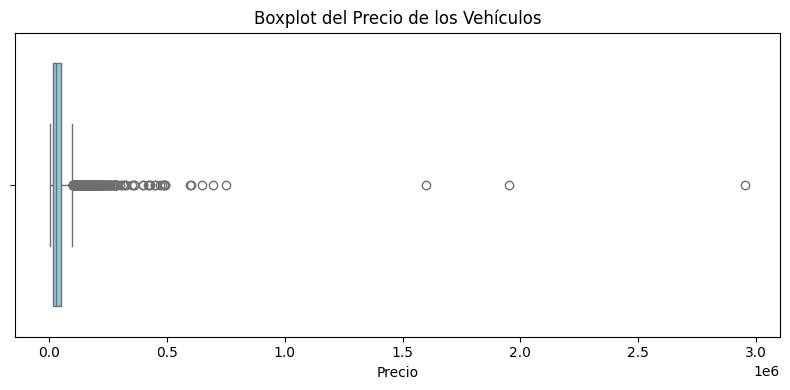

In [111]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["price"], color="skyblue")
plt.title("Boxplot del Precio de los Vehículos")
plt.xlabel("Precio")
plt.tight_layout()
plt.show()


In [ ]:
df["price"] = pd.to_numeric(df["price"], errors="coerce")

Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_price = df[(df["price"] < limite_inferior) | (df["price"] > limite_superior)]
print(f"Cantidad de outliers en 'price': {len(outliers_price)}")


Cantidad de outliers en 'price': 244


### Eliminamos los precios superiores a 200000 que nos dificultaban la predicción del modelo

Nos hemos dado cuenta que los precios mayores de 200.000€ creaban outliers y lso resultados del modelo se desajustaban. Por eso decidimos borrar las filas que el 'price' sea mayor que 200000.

In [45]:
df.drop(df[df['price'] > 200000].index, inplace=True)

### Eliminamos las filas que tienen valores vacíos en la columna 'engine_hp'

In [46]:
df.dropna(subset=['engine_hp'], inplace=True)

### Creamos nueva columna llamada 'age'

Calculamos los años del coche restando del año actual el valor en 'model_year' y lo guardamos en una nueva columna llamada 'age'.

In [47]:
df['age'] = 2025 - df['model_year']

### Pasamos la columna 'milage' a enteros 

In [48]:
df['milage'] = df['milage'].round(0).astype(int)

## DATASET LIMPIO Y NORMALIZADO 👇

In [ ]:
new_df = df.copy()
new_df.to_csv('data/cleaned_dataset.csv', index=False)

new_df.info()
new_df.head(50)

<class 'pandas.core.frame.DataFrame'>
Index: 3839 entries, 0 to 4008
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              3839 non-null   object 
 1   model              3839 non-null   object 
 2   model_year         3839 non-null   int64  
 3   milage             3839 non-null   int64  
 4   fuel_type          3839 non-null   object 
 5   transmission       3839 non-null   object 
 6   accident           3839 non-null   Int64  
 7   price              3839 non-null   int64  
 8   engine_hp          3839 non-null   float64
 9   brand_id           3839 non-null   int64  
 10  model_id           3839 non-null   int64  
 11  fuel_type_id       3839 non-null   int64  
 12  transmission_norm  3839 non-null   int64  
 13  age                3839 non-null   int64  
dtypes: Int64(1), float64(1), int64(8), object(4)
memory usage: 453.6+ KB


,brand,model,model_year,milage,fuel_type,transmission,accident,price,engine_hp,brand_id,model_id,fuel_type_id,transmission_norm,age
0,Ford,Utility Police Interceptor Base,2013,51,E85 Flex Fuel,6-Speed A/T,1,10300,300.0,14,1743,1,0,12
1,Hyundai,Palisade SEL,2021,35,Gasoline,8-Speed A/T,1,38005,352.0,19,1182,3,0,4
2,Lexus,RX 350 RX 350,2022,22,Gasoline,A/T,0,54598,309.0,27,1325,3,0,3
3,INFINITI,Q50 Hybrid Sport,2015,89,Hybrid,7-Speed A/T,0,15500,354.0,20,1242,4,0,10
4,Audi,Q3 45 S line Premium Plus,2021,10,Gasoline,8-Speed A/T,0,34999,232.0,3,1225,3,0,4


Seleccionamos las columnas que nos interesan y generamos un nuevo dataframe

In [ ]:
final_dataset = new_df[['milage', 'accident', 'price', 'engine_hp',
                        'brand_id', 'model_id', 'fuel_type_id', 'transmission_norm','age']]

final_dataset.to_csv('data/final_dataset.csv', index=False)

## ANÁLISIS EXPLORATORIO DE DATOS

### Overfitting <5%

Para asegurar un buen funcionamiento del modelo y que las predicciones sean lo más acertados posibles y sin tener un overfitting (sobreajuste), hemos hecho la comparación del rendimiento en entrenamiento y prueba usando la métrica R².

El modelo final de Random Forest obtuvo un R² de 0.7579 en entrenamiento y 0.7198 en prueba, lo que representa una diferencia de 3.82%, cumpliendo con el criterio de overfitting inferior al 5%.

Este resultado se ha logrado mediante ajustes en la profundidad de los árboles (max_depth=5) y en los parámetros de regularización (min_samples_leaf=12, min_samples_split=23), logrando un buen equilibrio entre precisión y generalización.

### Validación cruzada K-Fold

Utilizamos K-fold con 5 particiones, y el valor promedio de R² (0.804) indica que el modelo explica, en promedio, el 80.4% de la variabilidad de los precios de los vehículos en cada fold. Este nivel de precisión es especialmente valioso dado que se trabaja con datos reales de precios, donde puede haber ruido, outliers y muchas variables latentes que afectan el valor de un vehículo (estado del mercado, mantenimiento, etc.).

Su rendimiento no varía drásticamente entre distintas particiones del conjunto de datos, lo que es una clara señal de que el modelo generaliza bien y no depende de una única configuración de entrenamiento.

## Análisis multivariado

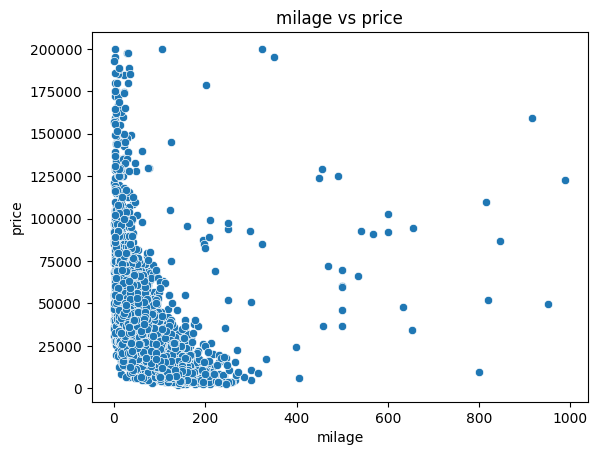

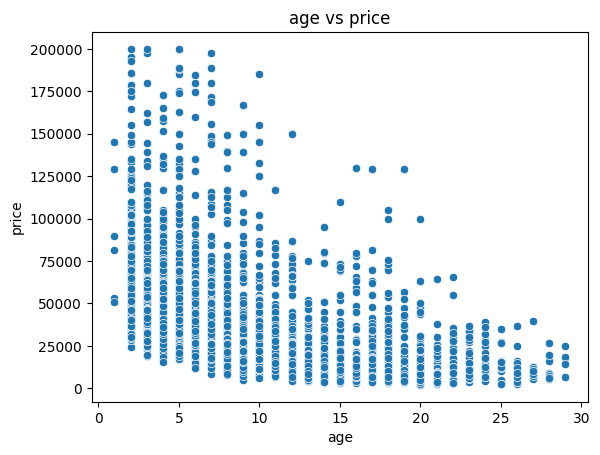

ValueError: Could not interpret value `engine` for `x`. An entry with this name does not appear in `data`.

In [60]:
# Precio vs variables principales
important_vars = ['milage', 'age', 'engine']
if 'age' not in df.columns:
    df['age'] = 2025 - df['model_year']
for var in important_vars:
    sns.scatterplot(data=df, x=var, y='price')
    plt.title(f'{var} vs price')
    plt.show()


## Outliers

### 1. Distribución del Precio de Vehículos
Comenzamos visualizando la distribución del precio para identificar su forma y posibles valores extremos.



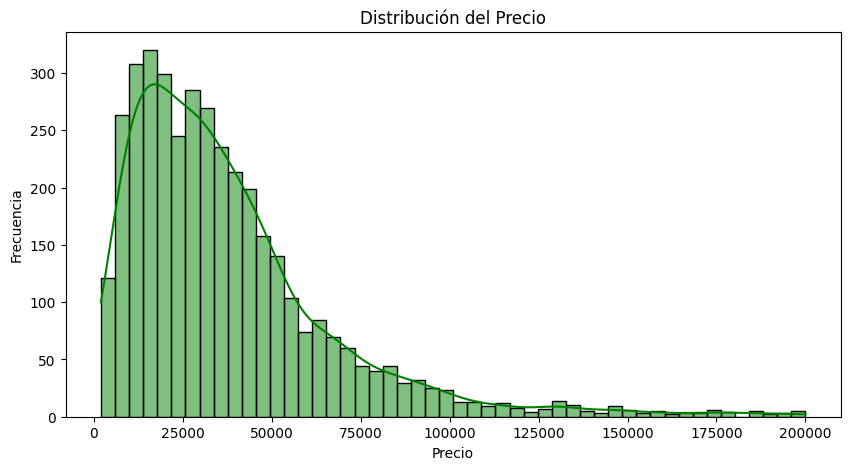

In [50]:
# 1. Distribución del Precio de Vehículos
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], kde=True, bins=50, color='green')
plt.title('Distribución del Precio')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

### 2. Relación entre Kilometraje y Precio
Analizamos cómo el kilometraje afecta al precio del vehículo, lo cual puede darnos pistas sobre el desgaste.


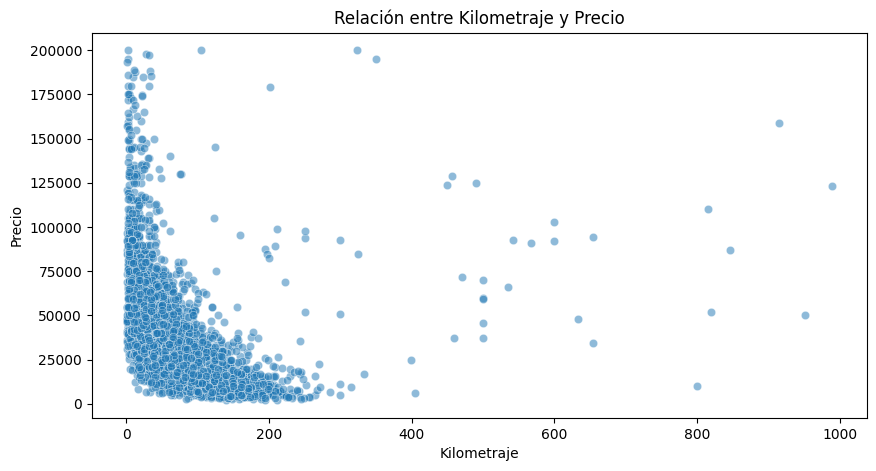

In [52]:
# 2. Relación entre Kilometraje y Precio
plt.figure(figsize=(10, 5))
sns.scatterplot(x='milage', y='price', data=df, alpha=0.5)
plt.title('Relación entre Kilometraje y Precio')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.show()

### 3. Potencia del Motor vs Precio
Evaluamos si un motor más potente implica un mayor precio.


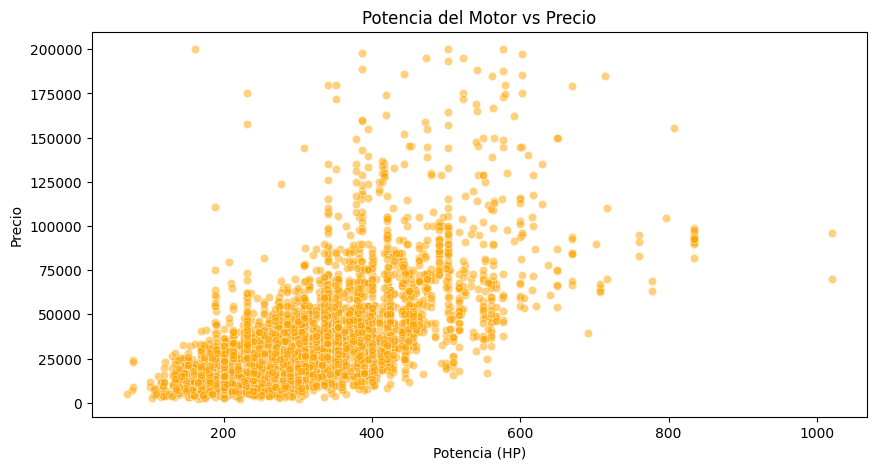

In [53]:
# 3. Potencia del Motor vs Precio
plt.figure(figsize=(10, 5))
sns.scatterplot(x='engine_hp', y='price', data=df, alpha=0.5, color='orange')
plt.title('Potencia del Motor vs Precio')
plt.xlabel('Potencia (HP)')
plt.ylabel('Precio')
plt.show()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5420\3419664231.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette='coolwarm')


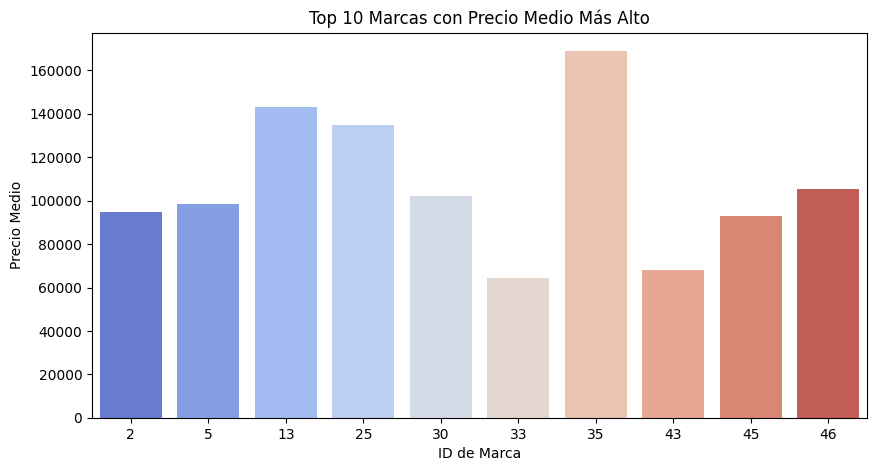

In [54]:
# 5. Precio medio por marca (Top 10 más caras)
top_brands = df.groupby('brand_id')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='coolwarm')
plt.title('Top 10 Marcas con Precio Medio Más Alto')
plt.xlabel('ID de Marca')
plt.ylabel('Precio Medio')
plt.show()

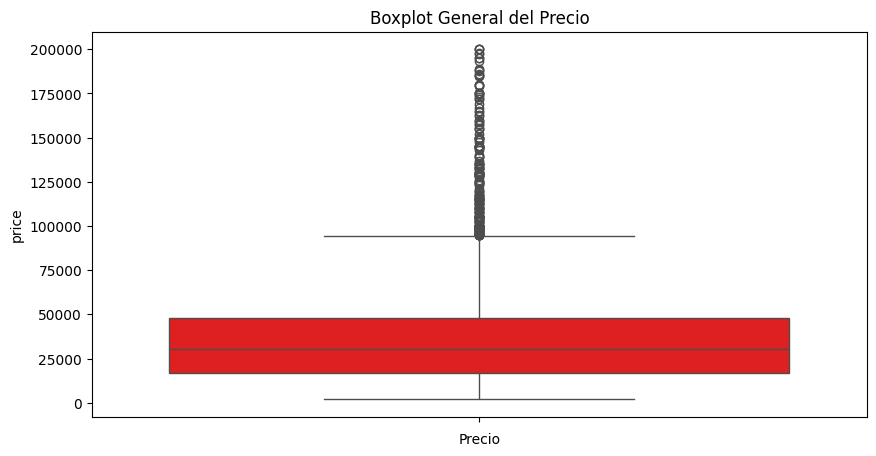

In [ ]:
# 6. Detección de outliers por boxplot general
plt.figure(figsize=(10, 5))
sns.boxplot(data['price'], color='red')
plt.title('Boxplot General del Precio')
plt.xlabel('Precio')
plt.show()

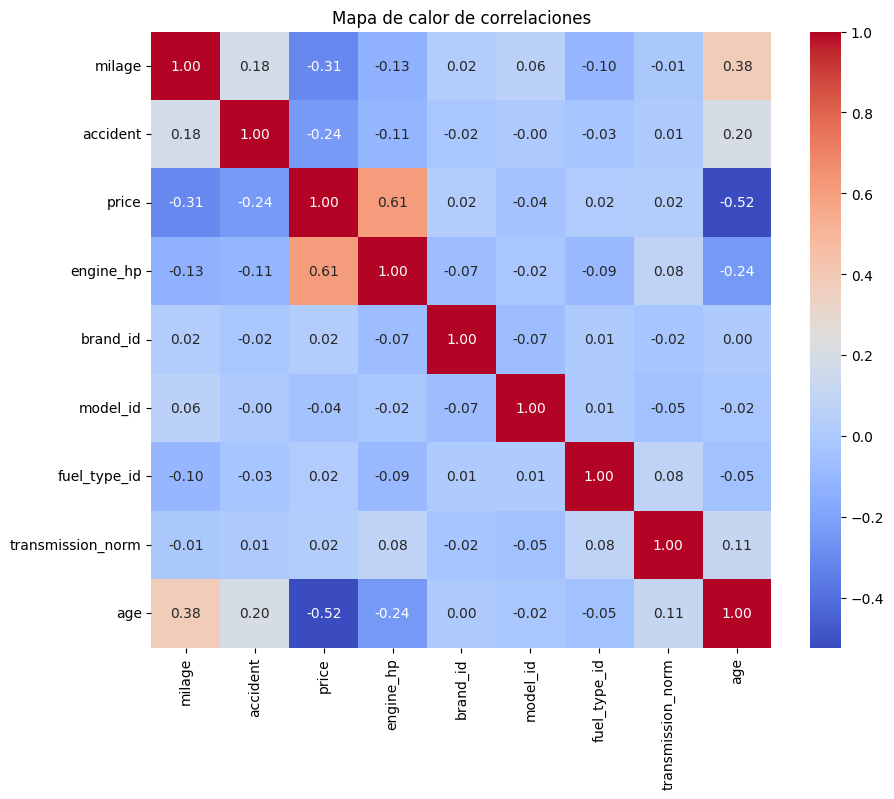

In [ ]:
# Correlación entre variables numéricas
plt.figure(figsize=(10, 8))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlaciones')
plt.show()

Este bloque genera un mapa de calor que muestra cómo se correlacionan las variables numéricas entre sí. Busca especialmente la relación del price con engine_hp, milage, age, etc.

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_9916\3186406815.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='fuel_type_id', palette='Set2')


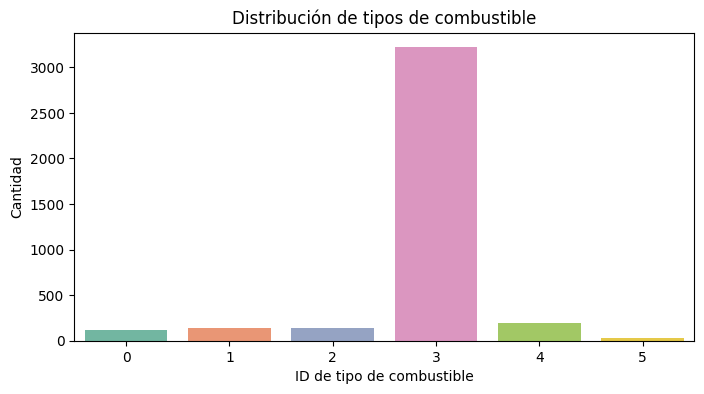

In [ ]:
# Conteo de tipos de combustible
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='fuel_type_id', palette='Set2')
plt.title('Distribución de tipos de combustible')
plt.xlabel('ID de tipo de combustible')
plt.ylabel('Cantidad')
plt.show()

Muestra cuántos vehículos hay de cada tipo de combustible. Aunque los valores son IDs (números), puedes interpretar que cada ID representa un tipo (por ejemplo: gasolina, diésel, eléctrico, etc.).

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_9916\3851478674.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='transmission_norm', y='price', palette='Set3')


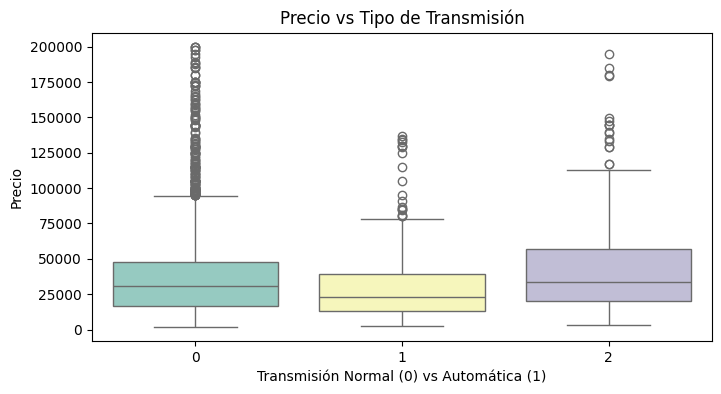

In [ ]:
# Precio promedio por tipo de transmisión
plt.figure(figsize=(8, 4))
sns.boxplot(data=data, x='transmission_norm', y='price', palette='Set3')
plt.title('Precio vs Tipo de Transmisión')
plt.xlabel('Transmisión Normal (0) vs Automática (1)')
plt.ylabel('Precio')
plt.show()

Este boxplot permite ver cómo varía el precio dependiendo del tipo de transmisión. Ayuda a entender si un tipo de transmisión está asociado con precios más altos o más bajos.

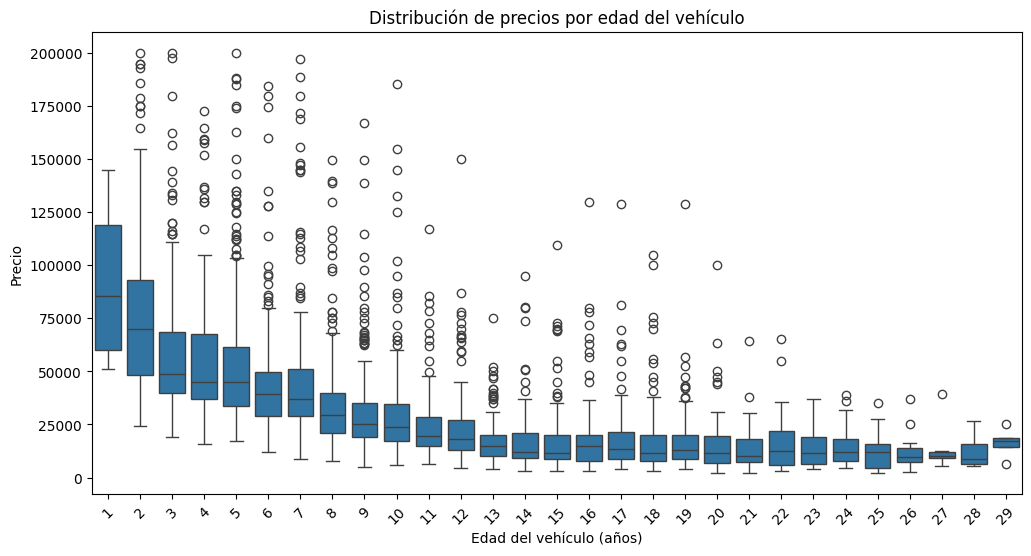

In [ ]:
# Boxplot para detectar outliers en el precio por edad del vehículo
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='age', y='price')
plt.title('Distribución de precios por edad del vehículo')
plt.xlabel('Edad del vehículo (años)')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()

Aquí podrás ver si hay vehículos muy caros o muy baratos para ciertas edades. Es útil para detectar outliers, y también para analizar si los vehículos más nuevos tienden a ser más caros.

## Exploración Justificativa del Modelo

El objetivo de este análisis exploratorio es dar soporte a las decisiones tomadas durante la construcción del modelo predictivo de precios de coches usados. Analizaremos las variables más relevantes utilizadas en el modelo, su relación con el precio, y verificaremos si los supuestos del modelo se alinean con la estructura del dataset.

En concreto, evaluaremos:

- Qué tan fuerte es la correlación entre las variables independientes y el precio.
- Cómo afectan las variables clave (edad, kilometraje, potencia, tipo de transmisión, etc.) al precio.
- Presencia de outliers que puedan estar afectando el modelo.
- Variables categóricas: ¿aportan valor predictivo o generan ruido?

También haremos un análisis para verificar si hay señales de no linealidad, multicolinealidad o relaciones que justifiquen una transformación futura del modelo.


             Feature  F-Statistic        P-Value
2          engine_hp  2248.095117   0.000000e+00
0                age  1441.339729  4.662321e-268
1             milage   395.441863   7.888782e-84
5           model_id     6.619244   1.012552e-02
6  transmission_norm     2.388482   1.223147e-01
4           brand_id     1.571493   2.100667e-01
3       fuel_type_id     0.994569   3.186912e-01


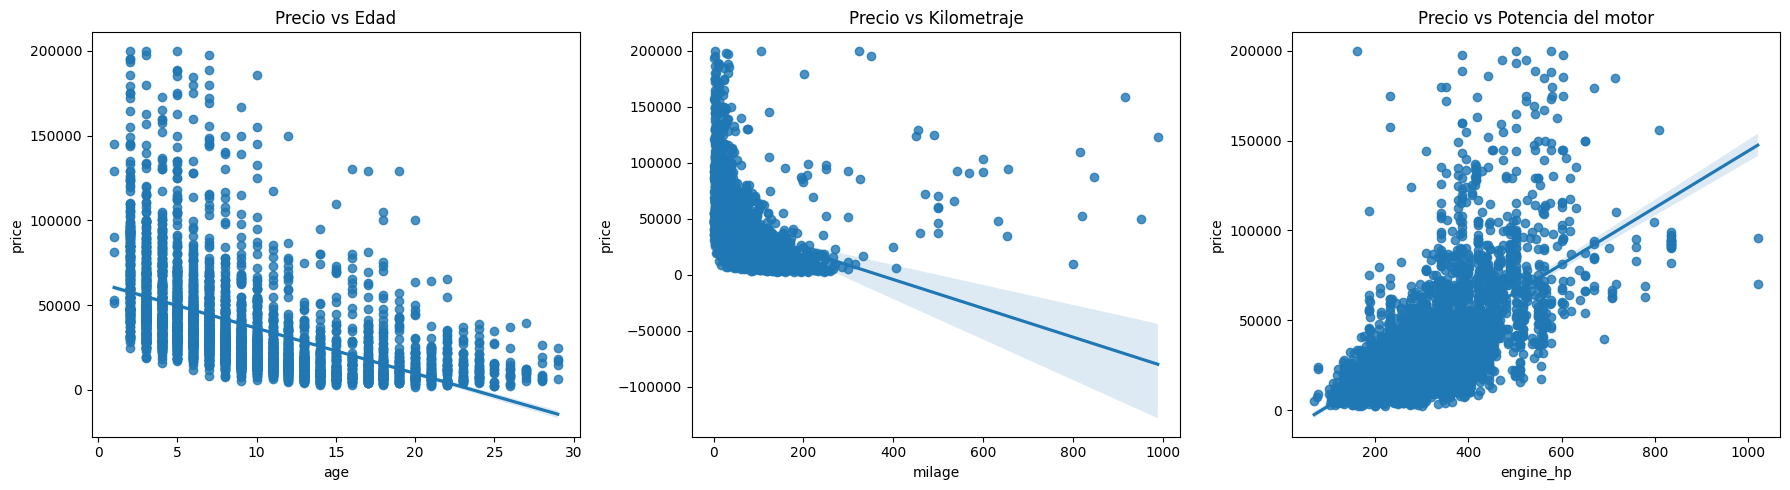

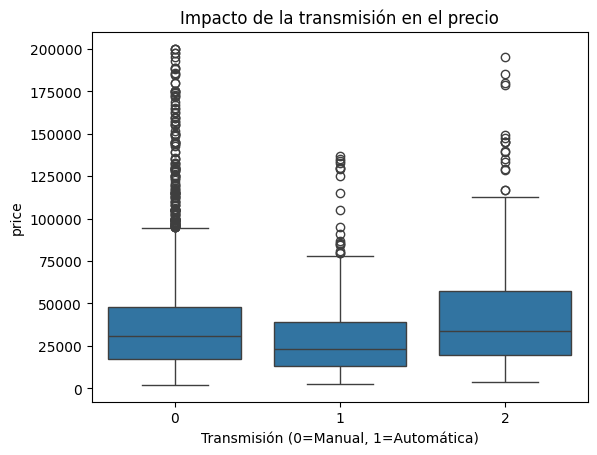

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
import numpy as np

X = data[['age', 'milage', 'engine_hp', 'fuel_type_id', 'brand_id', 'model_id', 'transmission_norm']]
y = data['price']

f_stats, p_values = f_regression(X, y)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'F-Statistic': f_stats,
    'P-Value': p_values
}).sort_values(by='F-Statistic', ascending=False)

print(feature_importance)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.regplot(ax=axes[0], x='age', y='price', data=data)
axes[0].set_title('Precio vs Edad')

sns.regplot(ax=axes[1], x='milage', y='price', data=data)
axes[1].set_title('Precio vs Kilometraje')

sns.regplot(ax=axes[2], x='engine_hp', y='price', data=data)
axes[2].set_title('Precio vs Potencia del motor')

plt.tight_layout()
plt.show()

sns.boxplot(x='transmission_norm', y='price', data=data)
plt.title('Impacto de la transmisión en el precio')
plt.xlabel('Transmisión (0=Manual, 1=Automática)')
plt.show()


## Evaluación del Modelo mediante el Análisis de Residuos

Para validar la calidad del modelo, no solo es suficiente con los valores de R² o el MSE. También es importante observar los residuos para identificar:

- Errores sistemáticos.
- Patrones no capturados (no linealidades).
- Heterocedasticidad (varianza no constante en los errores).
- Outliers que podrían estar influyendo en el modelo de forma negativa.

Un buen modelo debería producir residuos aleatorios, con distribución normal centrada en cero y sin patrones visibles.


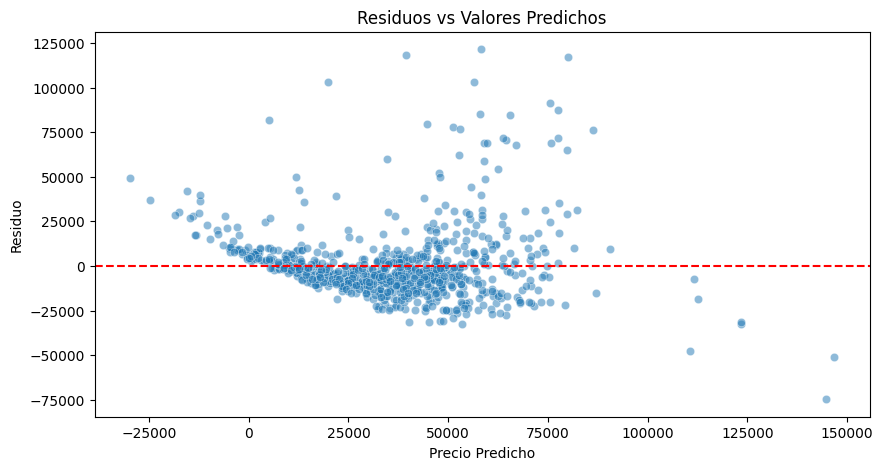

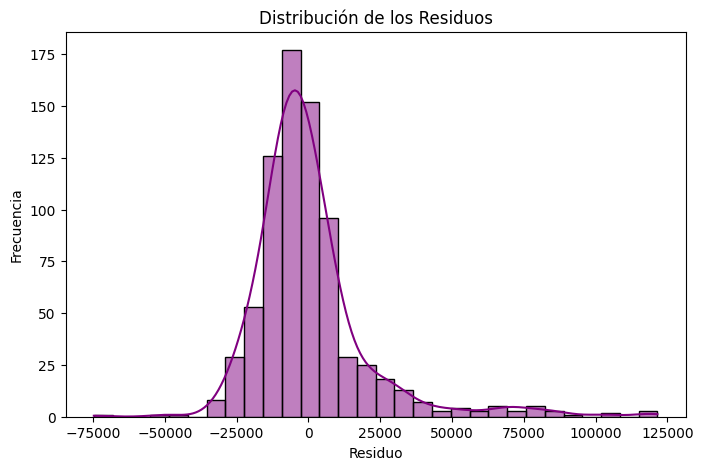

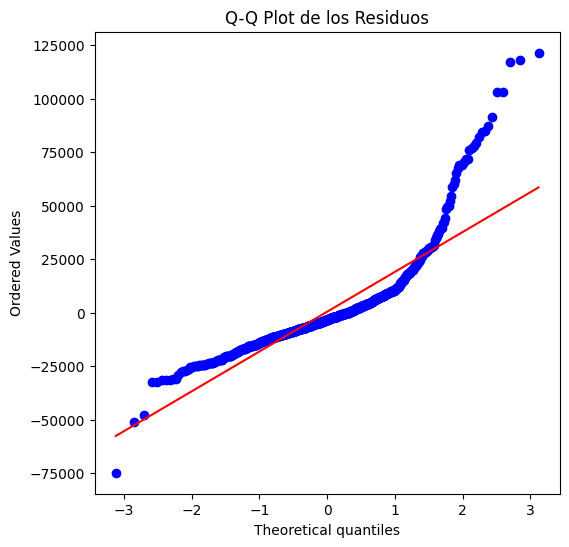

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

X = data[['age', 'milage', 'engine_hp', 'fuel_type_id', 'brand_id', 'model_id', 'transmission_norm']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs Valores Predichos')
plt.xlabel('Precio Predicho')
plt.ylabel('Residuo')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title('Distribución de los Residuos')
plt.xlabel('Residuo')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot de los Residuos")
plt.show()


### Crear relación entre modelo y marca para la interfaz Gradio

Para implementar un formulario interactivo en Gradio donde el usuario pueda:
- Seleccionar una marca y ver solo sus modelos asociados
- Seleccionar un modelo y que se autocomplete la marca

...hemos creado un archivo `model_brand_mapping.csv` que contiene la relación original entre modelo y marca **antes del encode**.

Este archivo nos permite:
- Sincronizar los desplegables de marca ↔ modelo
- Mejorar la experiencia de usuario
- Codificar correctamente antes de hacer la predicción

Esto es clave porque nuestro modelo final trabaja con IDs (`brand_id`, `model_id`), pero en la interfaz usamos nombres legibles.

In [ ]:
import pandas as pd


df = pd.read_csv("data/cleaned_dataset.csv")

model_brand_mapping = df[['model', 'brand']].drop_duplicates().sort_values(by='model')

model_brand_mapping.to_csv("data/model_brand_mapping.csv", index=False)

print("Archivo model_brand_mapping.csv creado correctamente.")
model_brand_mapping.head()


Archivo model_brand_mapping.csv creado correctamente.


,model,brand
668,124 Spider Abarth,FIAT
2774,128 i,BMW
483,135 i,BMW
1632,135 is,BMW
324,1500 Big Horn,RAM
